In [3]:
from azureml.core.model import Model
from utils.remote_execute_util import get_ws
from utils.mnist_utils import load_data
import os
import pickle
from sklearn.externals import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
ws = get_ws(tenant='XYZ')

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [5]:
model = Model(ws, 'sklearn_mnist')
model.download(target_dir=os.getcwd(), exist_ok=True)

# verify the downloaded model file
file_path = os.path.join(os.getcwd(), "sklearn_mnist_model.pkl")

os.stat(file_path)


os.stat_result(st_mode=33206, st_ino=5348024558722349, st_dev=2384014770, st_nlink=1, st_uid=0, st_gid=0, st_size=63672, st_atime=1567165601, st_mtime=1567165601, st_ctime=1567164486)

In [6]:
data_folder = os.path.join(os.getcwd(), '..\\data')
# note we also shrink the intensity values (X) from 0-255 to 0-1. This helps the neural network converge faster
X_test = load_data(os.path.join(data_folder, 'test-images.gz'), False) / 255.0
y_test = load_data(os.path.join(
    data_folder, 'test-labels.gz'), True).reshape(-1)

In [7]:
clf = joblib.load(os.path.join(os.getcwd(), 'sklearn_mnist_model.pkl'))
y_hat = clf.predict(X_test)

In [8]:
conf_mx = confusion_matrix(y_test, y_hat)
print(conf_mx)
print('Overall accuracy:', np.average(y_hat == y_test))

[[ 962    0    0    2    1    6    4    4    1    0]
 [   0 1111    5    1    0    2    3    2   11    0]
 [   5    7  932   15    9    3   13    6   39    3]
 [   4    1   19  915    1   22    4   11   23   10]
 [   1    1    7    3  913    0   10    7   10   30]
 [  11    3    4   33   10  776   15    5   30    5]
 [   9    3    9    1    6   14  913    2    1    0]
 [   1    7   26    3    7    1    0  953    3   27]
 [   9   12    8   22    7   25   14    7  857   13]
 [   9    8    1   10   25    6    0   19    6  925]]
Overall accuracy: 0.9257


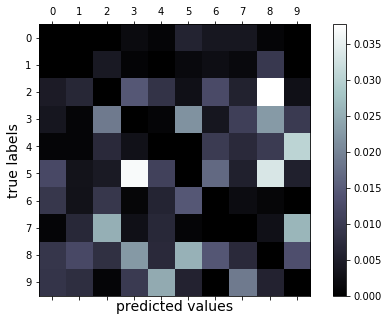

In [9]:
# normalize the diagonal cells so that they don't overpower the rest of the cells when visualized
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
cax = ax.matshow(norm_conf_mx, cmap=plt.cm.bone)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
fig.colorbar(cax)
plt.ylabel('true labels', fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.savefig('conf.png')
plt.show()